![](logo1.jpg)

#Diamonds Price Prediction By: Hussein Abd El Hafeez in ShAi Training Competition

#====> Introduction <====

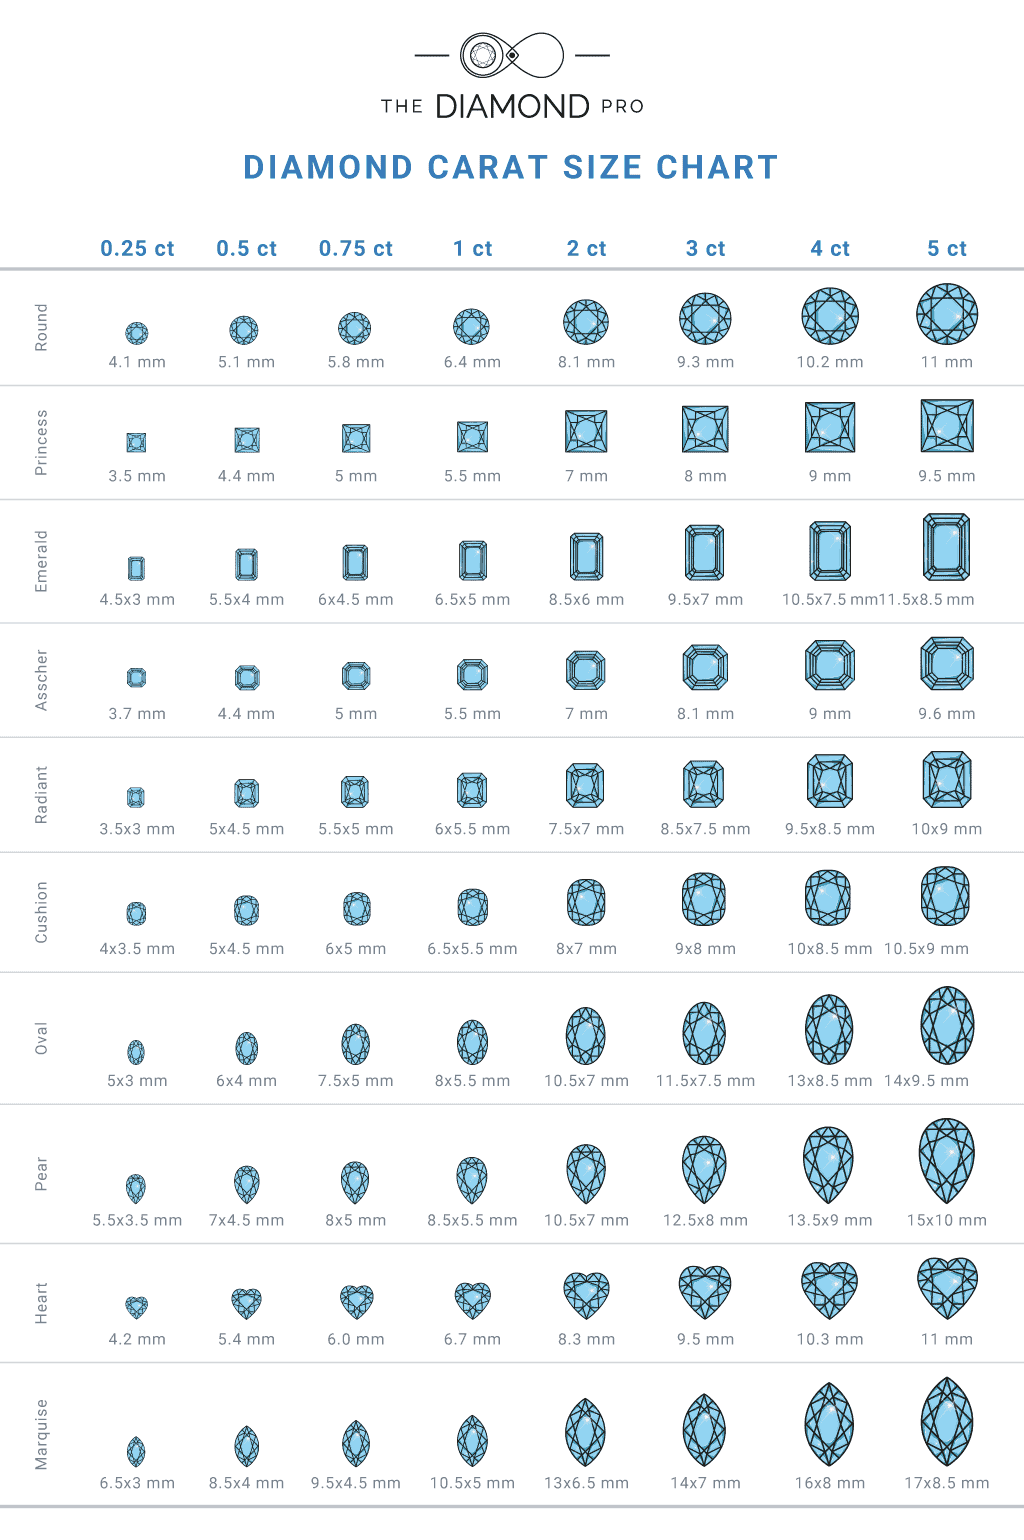

1 Diamond cararts =  0.20 grams

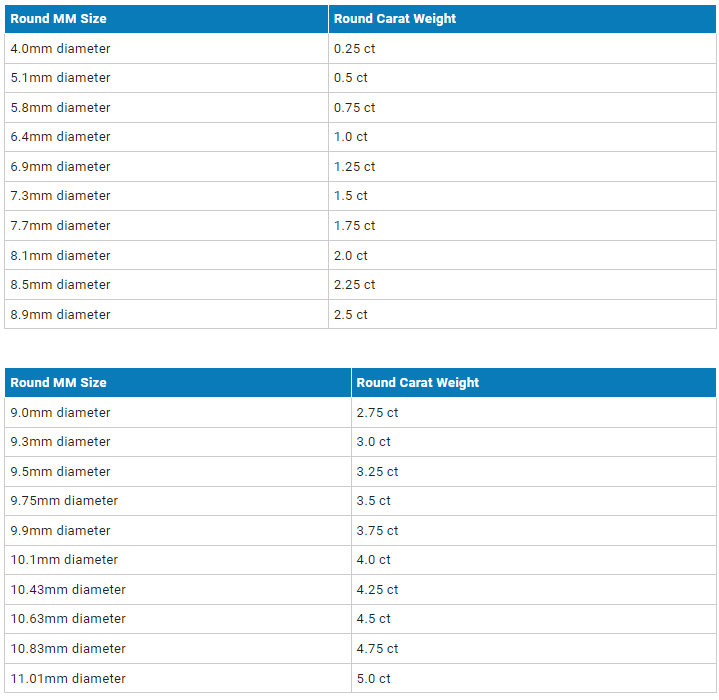

=======================================================================

Diamond Clarity Guide 

****** Descending Order **

Internally Flawless (IF)

Very Very Small Inclusions 1 (VVS1) (1st degree)

Very Very Small Inclusions 2 (VVS2) (2nd degree)

Very Small Inclusions 1 (VS1) (1st degree)

Very Small Inclusions 2 (VS2)  (2nd degree)

Small Inclusions 1 (SI1) (1st degree)

Small Inclusions 2 (SI2)  (2nd degree)

Inclusions 1 (I1) (1st degree)


Inclusions  (I2 ,I3)  (2nd , 3rd degree)





=======================================================================

cut quality of the cut

****** Descending Order **

Ideal

Premium

Very Good

Good

Fair

=======================================================================

Diamond Color index

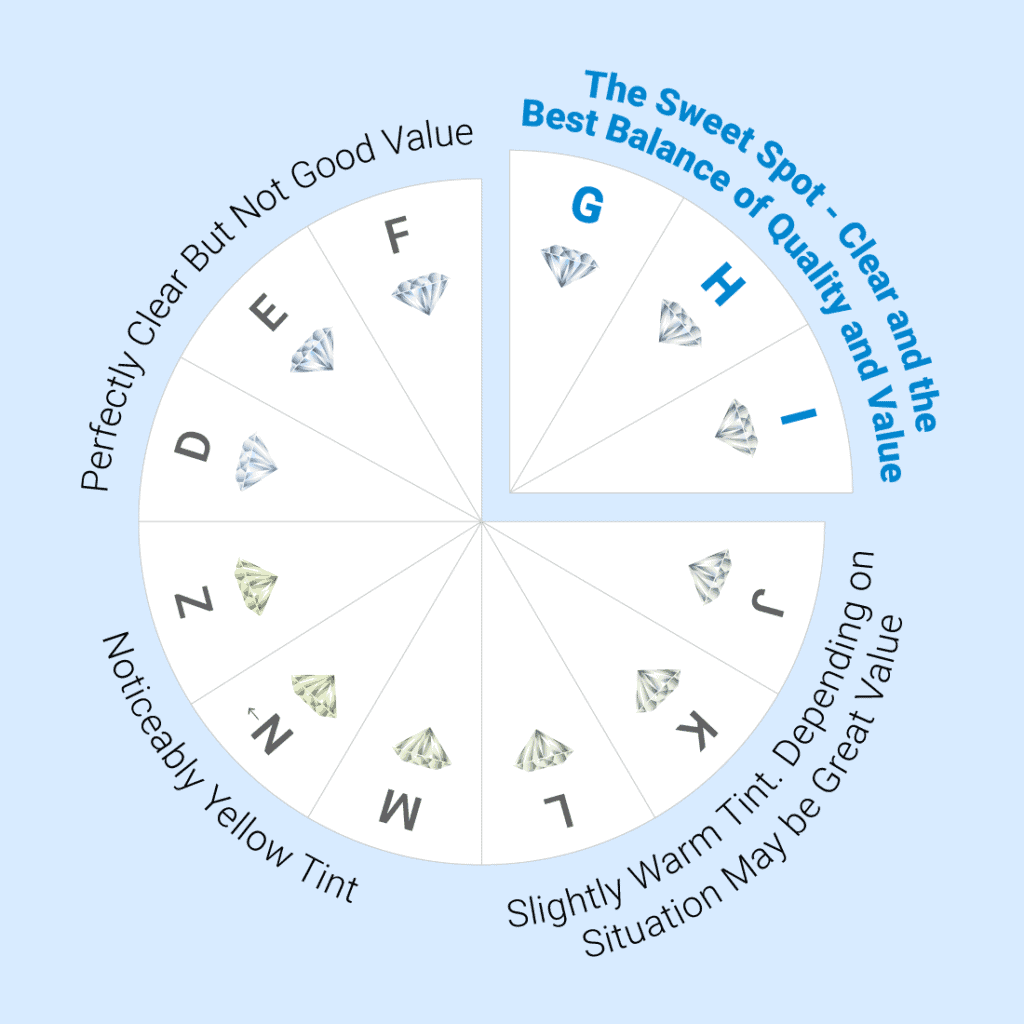

 depth percentage = 2 * z / (x + y)  %

***
# 1- Get the Data & Import libraries
***

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [ ]:
## Read train.csv as a dataframe called Diamond_Price.
path = ('/content/train.csv')
Diamond_Price = pd.read_csv(path)


#====> Data processing <====

Steps:-

1-Data overview

2- Data visualization

3-Data cleaning

4-Encoding categorical variables

5-Model Building 

6- 6-Applying the model

7- save the results for submission

## 1-Data overview

### 1-Discover Head,Tail and some samples

In [ ]:
Diamond_Price.shape # to know shape of data

(43152, 11)

In [ ]:
Diamond_Price.head()

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,2,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
2,3,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
3,4,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
4,5,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50


In [ ]:
Diamond_Price.tail()

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
43147,43148,0.52,Ideal,E,VS2,61.5,56.0,1760,5.16,5.18,3.18
43148,43149,0.72,Very Good,D,VS2,62.1,59.0,3016,5.70,5.73,3.55
43149,43150,0.44,Premium,I,VVS1,61.5,58.0,990,4.95,4.87,3.02
43150,43151,0.31,Premium,E,VS1,60.2,58.0,734,4.38,4.43,2.65
43151,43152,0.33,Ideal,G,VS2,61.2,55.0,743,4.49,4.46,2.74


In [ ]:
Diamond_Price.sample(5)

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
2281,2282,0.24,Very Good,E,VS2,62.1,59.0,419,3.98,4.01,2.48
26197,26198,0.51,Very Good,E,VVS2,62.8,57.0,2146,5.06,5.10,3.19
9355,9356,1.15,Ideal,G,VVS1,60.6,56.0,9377,6.83,6.80,4.13
42141,42142,1.09,Ideal,E,VS2,60.7,57.0,9346,6.66,6.68,4.05
23421,23422,1.24,Ideal,I,VS2,62.0,55.0,6076,6.90,6.87,4.27


### 2-Quick description of the data

In [ ]:
Diamond_Price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43152 entries, 0 to 43151
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id       43152 non-null  int64  
 1   carat    43152 non-null  float64
 2   cut      43152 non-null  object 
 3   color    43152 non-null  object 
 4   clarity  43152 non-null  object 
 5   depth    43152 non-null  float64
 6   table    43152 non-null  float64
 7   price    43152 non-null  int64  
 8   x        43152 non-null  float64
 9   y        43152 non-null  float64
 10  z        43152 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 3.6+ MB


In [ ]:
Diamond_Price.describe() #statistics about data

,Id,carat,depth,table,price,x,y,z
count,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000
mean,21576.500000,0.797855,61.747177,57.458347,3929.491912,5.731568,5.735018,3.538568
std,12457.053745,0.473594,1.435454,2.233904,3985.527795,1.121279,1.148809,0.708238
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,10788.750000,0.400000,61.000000,56.000000,947.750000,4.710000,4.720000,2.910000
50%,21576.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,32364.250000,1.040000,62.500000,59.000000,5312.000000,6.540000,6.540000,4.040000
max,43152.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


===> Note #1: <===

"min" value of "x", "y", "z" are zero .indicates that there are faulty values in data that hav no dimension or 2-dimensional diamonds. So we need to filter out those as it clearly faulty data points.

In [ ]:
(Diamond_Price == 0).sum(axis=0)

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [ ]:
# Checking for value 0 in the columns 'x', 'y' and 'z'
val0=Diamond_Price[np.logical_or(np.logical_or(Diamond_Price['x'] == 0, Diamond_Price['y'] == 0), Diamond_Price['z'] == 0)]

val0 

,carat,cut,color,clarity,depth,table,price,x,y,z
571,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
903,2.25,Premium,I,SI1,61.3,58.0,15397,8.52,8.42,0.0
1221,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
4980,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
6765,0.71,Good,F,SI2,64.1,60.0,2130,0.00,0.00,0.0
11221,2.80,Good,G,SI2,63.8,58.0,18788,8.90,8.85,0.0
13727,2.02,Premium,H,VS2,62.7,53.0,18207,8.02,7.95,0.0
14265,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
16971,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
21061,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0


In [ ]:
print(len(val0))

17


#### 3-looking for Categorical columns

In [ ]:
s = (Diamond_Price.dtypes =="object")
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)

Categorical variables:
['cut', 'color', 'clarity']


In [ ]:
Diamond_Price["cut"].value_counts()

Ideal        17203
Premium      11113
Very Good     9658
Good          3881
Fair          1297
Name: cut, dtype: int64

In [ ]:
Diamond_Price["color"].value_counts()

G    9060
E    7832
F    7633
H    6651
D    5421
I    4265
J    2290
Name: color, dtype: int64

In [ ]:
Diamond_Price["clarity"].value_counts()

SI1     10428
VS2      9824
SI2      7432
VS1      6475
VVS2     4041
VVS1     2904
IF       1442
I1        606
Name: clarity, dtype: int64

## 2- Data visualization

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

##### Pairplot for Diamond_Price dataframe.

In [ ]:
Diamond_Price.drop(columns=["Id"], inplace=True) # not Needed in this work

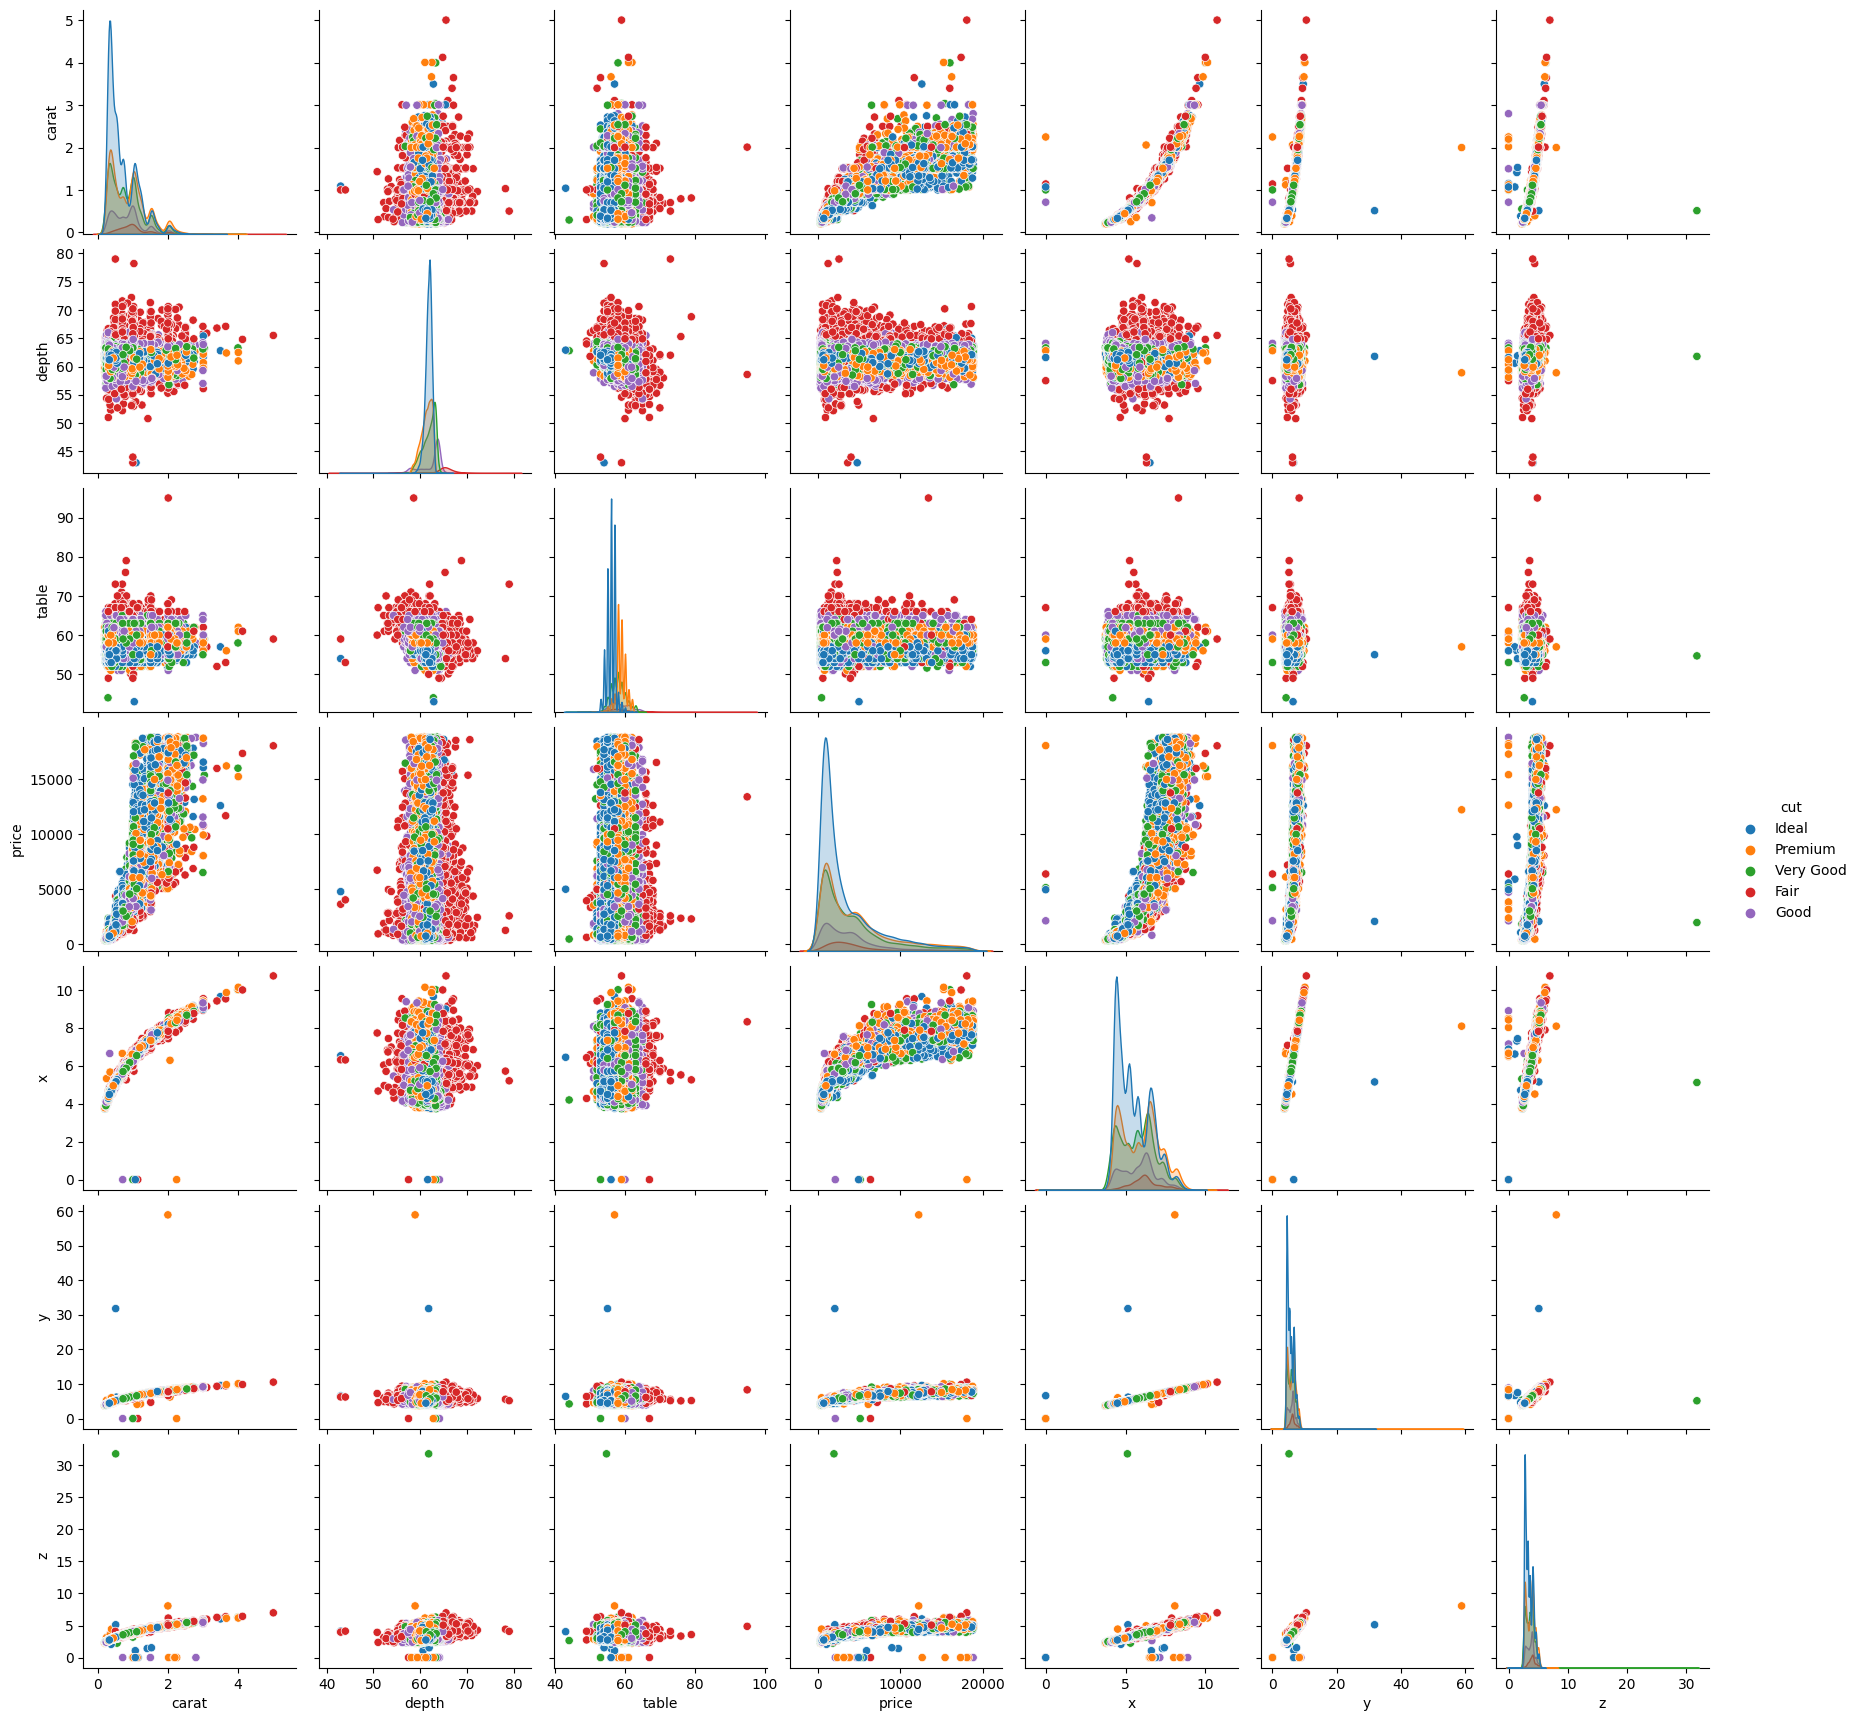

In [ ]:
sns.pairplot(Diamond_Price,hue='cut') ##using hue='cut' to have better details 

====> note #2: from pairplots <====

There are some features with datapoint that are far from the rest of the dataset which will affect the outcome of our model.

"y" and "z" have some dimensional outlies in our dataset that needs to be eliminated.

so lets look deeping in this columns 

Text(0.5, 0.98, 'Regression Line on "Price" vs "x"')

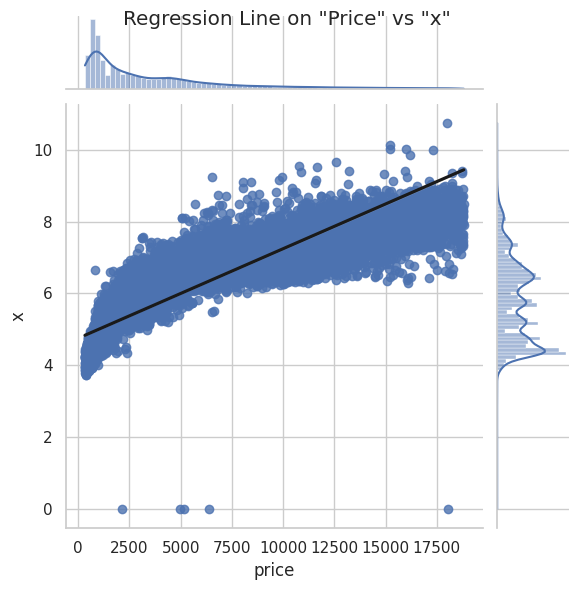

In [ ]:
sns.set(style="white", color_codes=True)
sns.set_style('whitegrid')
px = sns.jointplot(x="price", y="x", data=Diamond_Price, kind='reg', joint_kws={'line_kws':{'color':'k'}})
px.fig.suptitle('Regression Line on "Price" vs "x"')

Text(0.5, 0.98, 'Regression Line on "Price" vs "y"')

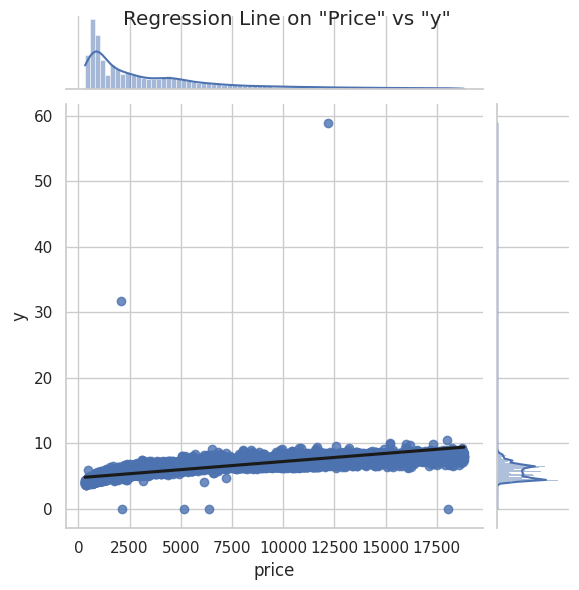

In [ ]:

py = sns.jointplot(x="price", y="y", data=Diamond_Price, kind='reg', joint_kws={'line_kws':{'color':'k'}})
py.fig.suptitle('Regression Line on "Price" vs "y"')

Text(0.5, 0.98, 'Regression Line on "Price" vs "z"')

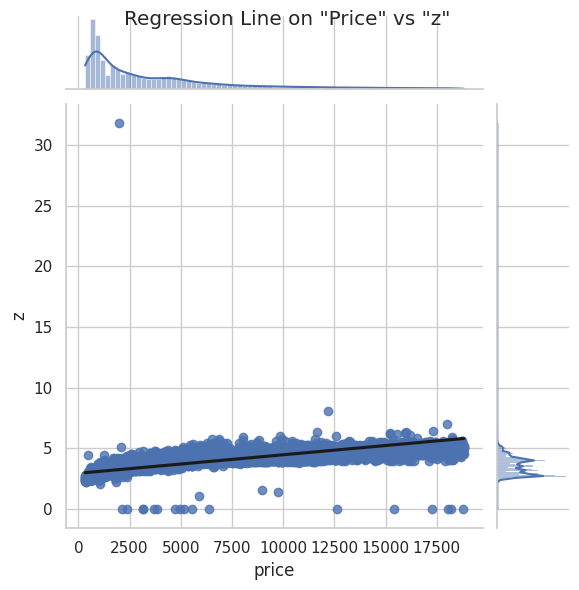

In [ ]:
pz = sns.jointplot(x="price", y="z", data=Diamond_Price, kind='reg', joint_kws={'line_kws':{'color':'k'}})
pz.fig.suptitle('Regression Line on "Price" vs "z"')

Text(0.5, 0.98, 'Regression Line on "Price" vs "depth"')

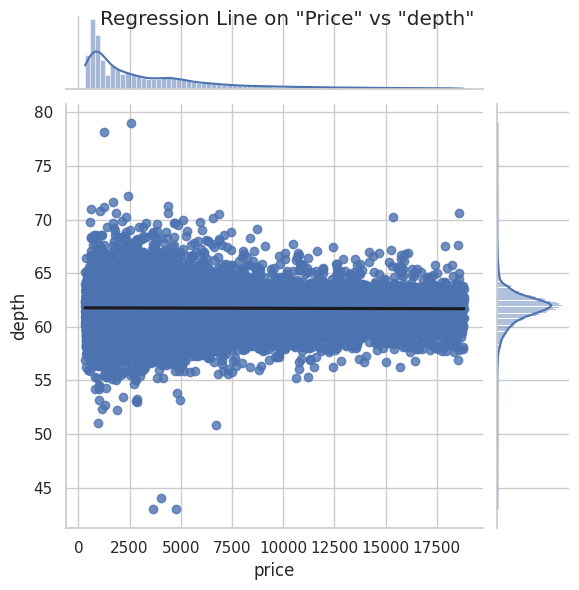

In [ ]:
pde = sns.jointplot(x="price", y="depth", data=Diamond_Price, kind='reg', joint_kws={'line_kws':{'color':'k'}})
pde.fig.suptitle('Regression Line on "Price" vs "depth"')

Text(0.5, 0.98, 'Regression Line on "Price" vs "table"')

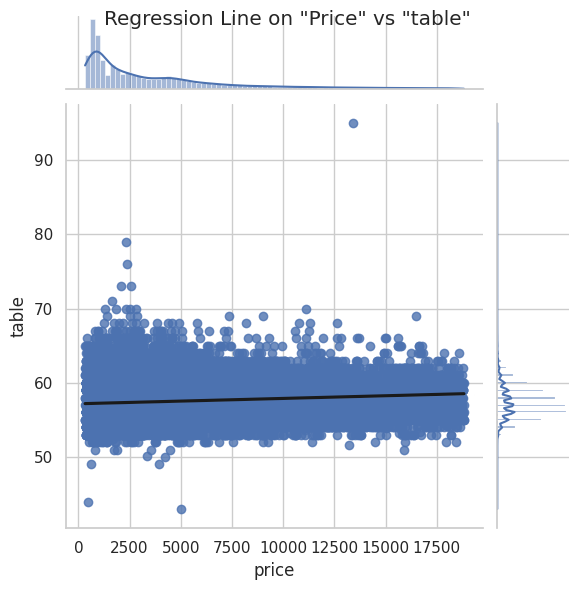

In [ ]:
pt = sns.jointplot(x="price", y="table", data=Diamond_Price, kind='reg', joint_kws={'line_kws':{'color':'k'}})
pt.fig.suptitle('Regression Line on "Price" vs "table"')

#### Histogram for Diamond_Price dataframe.

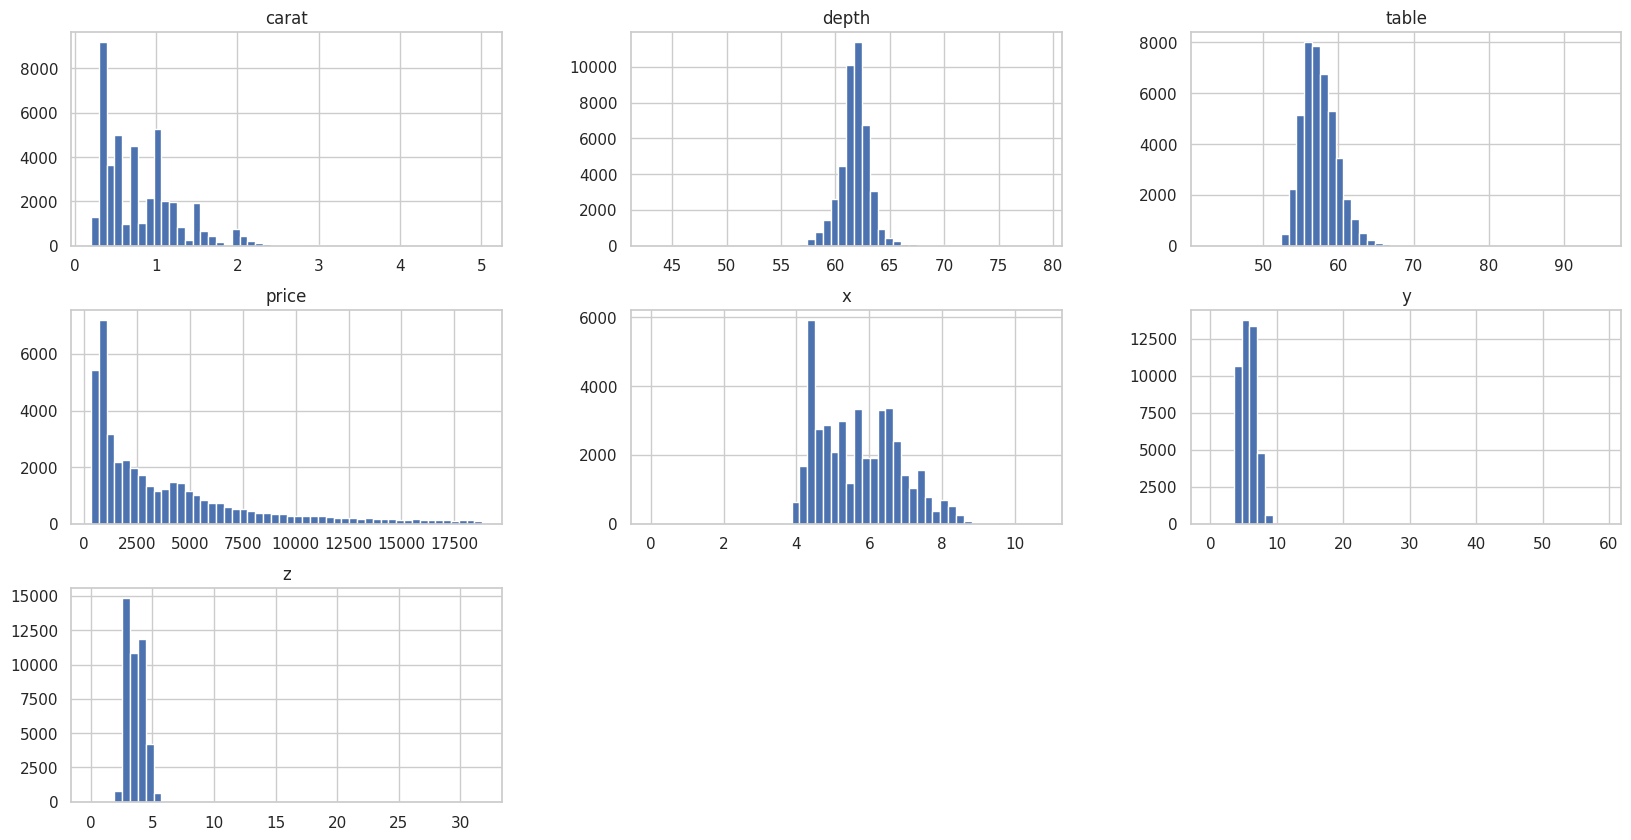

In [ ]:
Diamond_Price.hist(figsize = (20,10),bins = 50)
plt.show()

In [ ]:
# checking the values for each categorical variable
categorical_cols = ['cut','color','clarity']
for column in categorical_cols:
    print('Unique {} attributes:'.format(column))
    display(Diamond_Price[column].unique().tolist())

Unique cut attributes:


['Ideal', 'Premium', 'Very Good', 'Fair', 'Good']

Unique color attributes:


['I', 'G', 'F', 'H', 'D', 'E', 'J']

Unique clarity attributes:


['SI2', 'VVS2', 'VS2', 'IF', 'VS1', 'SI1', 'VVS1', 'I1']

In [ ]:
def barplots(variables,target_var):
    """
    Function to plot graphical relationship
    between categorical variables.
    """
    for num, attribute in enumerate(variables):
        plt.figure(num)
        sns.barplot(x=attribute, y = target_var, data=Diamond_Price)

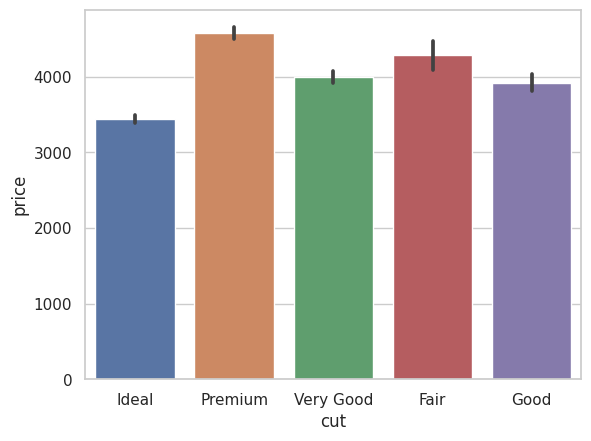

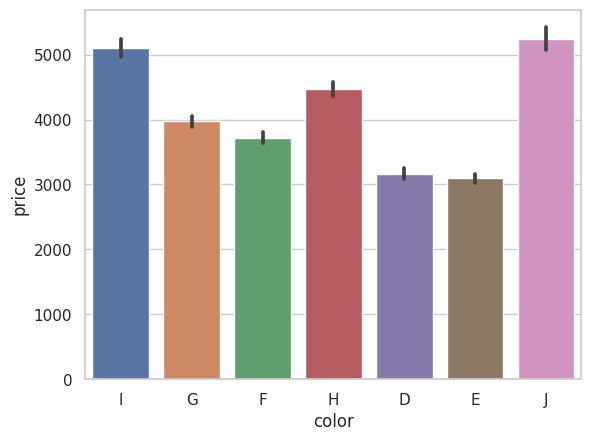

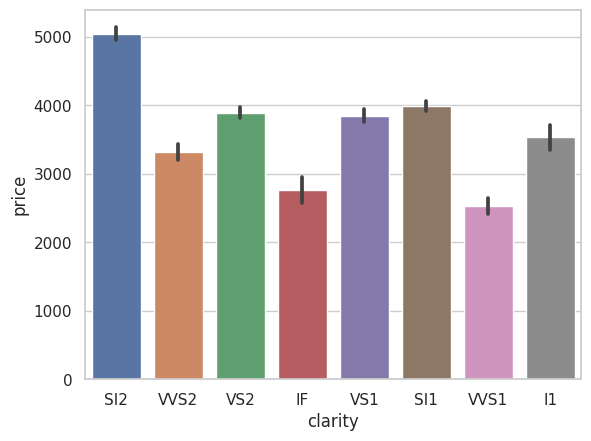

In [ ]:
barplots(categorical_cols,'price')

## 3- Data Cleaning

from Note #1 and note #2 we need to clean the out liers and x,y,z = 0


we will use correlation to focus in cleaning in main factors that affect the needed target of our project

<ipython-input-145-9b7ad0558357>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat= Diamond_Price.corr()


<Axes: >

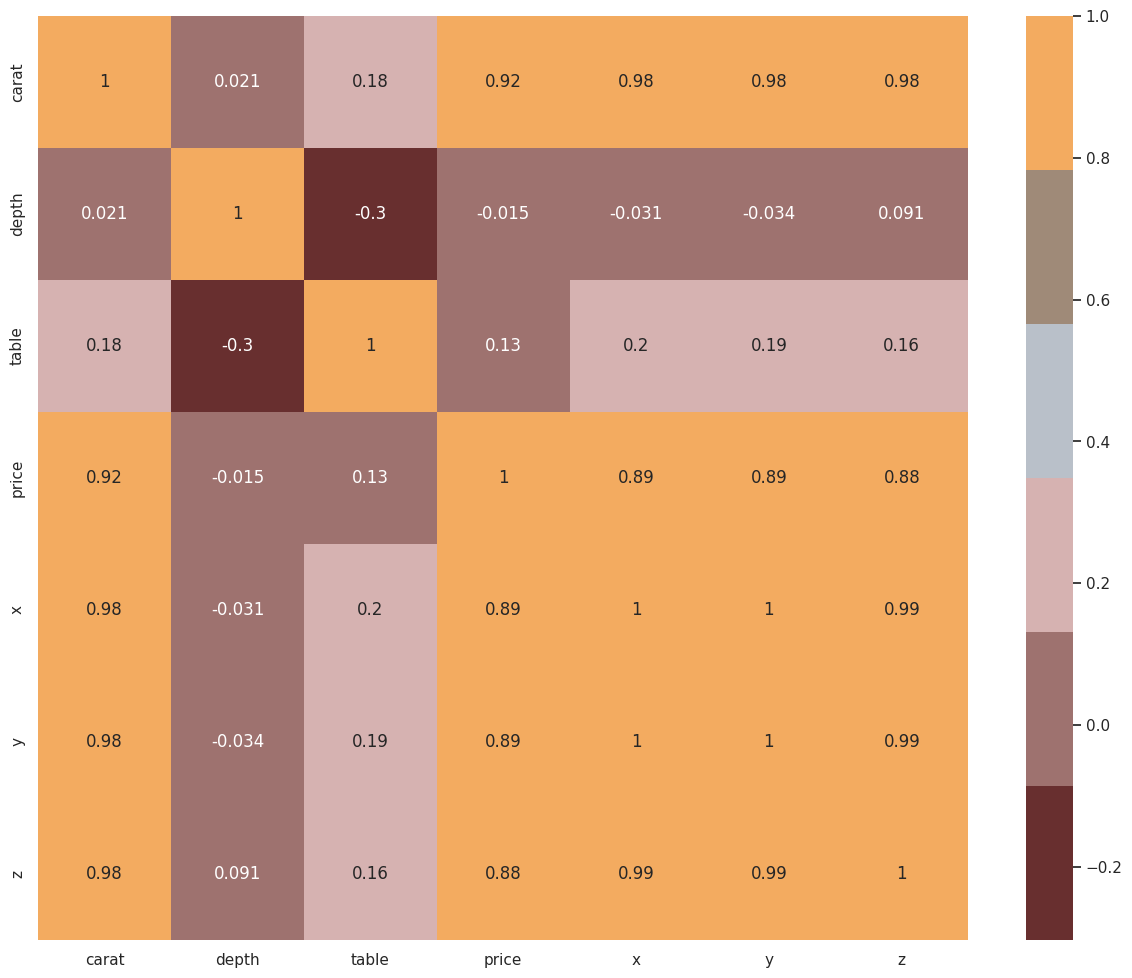

In [ ]:
cmap = sns.diverging_palette(205, 133, 63, as_cmap=True)
cols = (["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
corrmat= Diamond_Price.corr()
f, ax = plt.subplots(figsize=(15,12))
sns.heatmap(corrmat,cmap=cols,annot=True)

===> notes <===

"x", "y", "z" show a high correlation to our target column(price).

"cut","depth","table" show low correlation.


### Removing x,y,z == 0

In [ ]:
print(Diamond_Price.shape)
Diamond_Price = Diamond_Price.drop(Diamond_Price[Diamond_Price["x"]==0].index)
Diamond_Price = Diamond_Price.drop(Diamond_Price[Diamond_Price["y"]==0].index)
Diamond_Price = Diamond_Price.drop(Diamond_Price[Diamond_Price["z"]==0].index)
print(Diamond_Price.shape)

(43152, 10)
(43135, 10)


### Removing Outliers

In [ ]:
Q1_x,Q3_x=np.percentile(Diamond_Price['x'],[25,75])
IQR_x=Q3_x-Q1_x
    
min_x=Q1_x - 1.5*IQR_x
max_x=Q3_x + 1.5*IQR_x

print("limits of x",min_x, " ", max_x)

Q1_y,Q3_y=np.percentile(Diamond_Price['y'],[25,75])
IQR_y=Q3_y-Q1_y
    
min_y=Q1_y-1.5*IQR_y
max_y=Q3_y+1.5*IQR_y

print("limits of y",min_y, " ", max_y)

Q1_z,Q3_z=np.percentile(Diamond_Price['z'],[25,75])
IQR_z=Q3_z-Q1_z
    
min_z=Q1_z-1.5*IQR_z
max_z=Q3_z+1.5*IQR_z

print("limits of z",min_z, " ", max_z)

Q1_c,Q3_c=np.percentile(Diamond_Price['carat'],[25,75])
IQR_c=Q3_c-Q1_c
    
min_c=Q1_c-1.5*IQR_c
max_c=Q3_c+1.5*IQR_c

print("limits of carat",min_c, " ", max_c)


Q1_t,Q3_t=np.percentile(Diamond_Price['table'],[25,75])
IQR_t=Q3_t-Q1_t

min_t=Q1_t-1.5*IQR_t
max_t=Q3_t+1.5*IQR_t

print("limits of table",min_t, " ", max_t)


limits of x 1.9649999999999999   9.285
limits of y 1.9899999999999993   9.27
limits of z 1.2150000000000003   5.734999999999999
limits of carat -0.5599999999999999   2.0
limits of table 51.5   63.5


In [ ]:
#Dropping the outliers. 
print(Diamond_Price.shape)

Diamond_Price = Diamond_Price[(Diamond_Price["x"]> min_x) & (Diamond_Price["x"]<max_x)]
Diamond_Price = Diamond_Price[(Diamond_Price["y"]>min_y) & (Diamond_Price["y"]<max_y)]
Diamond_Price = Diamond_Price[(Diamond_Price["z"]>min_z) & (Diamond_Price["z"]<max_z)]

print(Diamond_Price.shape)

(43105, 10)

In [ ]:
# checking for duplicate data
Diamond_Price[Diamond_Price.duplicated()]

,carat,cut,color,clarity,depth,table,price,x,y,z
5428,0.57,Premium,E,SI2,62.5,54.0,1058,5.35,5.30,3.33
6704,2.01,Fair,H,SI2,64.9,56.0,10184,7.88,7.81,5.09
7723,0.32,Ideal,H,VVS2,61.8,55.0,828,4.42,4.38,2.72
11089,1.55,Very Good,H,SI1,63.2,57.0,7066,7.35,7.31,4.64
11334,0.60,Very Good,E,SI2,63.2,60.0,1250,5.32,5.28,3.35
...,...,...,...,...,...,...,...,...,...,...
41648,0.52,Ideal,D,VS2,61.8,55.0,1822,5.16,5.19,3.20
41775,0.71,Good,E,SI2,57.5,58.0,1783,5.91,5.89,3.39
42165,0.52,Premium,F,SI2,62.7,57.0,1073,5.11,5.07,3.19
42474,0.51,Ideal,F,VVS2,61.2,56.0,2093,5.17,5.19,3.17


In [ ]:
# dropping for duplicate data
print(Diamond_Price.shape)
Diamond_Price = Diamond_Price.drop_duplicates()
print(Diamond_Price.shape)

(43008, 10)
(43008, 10)


In [ ]:
Diamond_Price.describe()

,carat,depth,table,price,x,y,z
count,43008.000000,43008.000000,43008.000000,43008.000000,43008.000000,43008.000000,43008.000000
mean,0.795952,61.745838,57.458773,3921.803106,5.729486,5.731113,3.537738
std,0.468874,1.432680,2.232950,3974.790038,1.115401,1.107597,0.688447
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.410000
25%,0.400000,61.000000,56.000000,947.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2400.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5302.000000,6.540000,6.530000,4.030000
max,3.010000,79.000000,95.000000,18823.000000,9.250000,9.200000,5.730000


## Data after processing

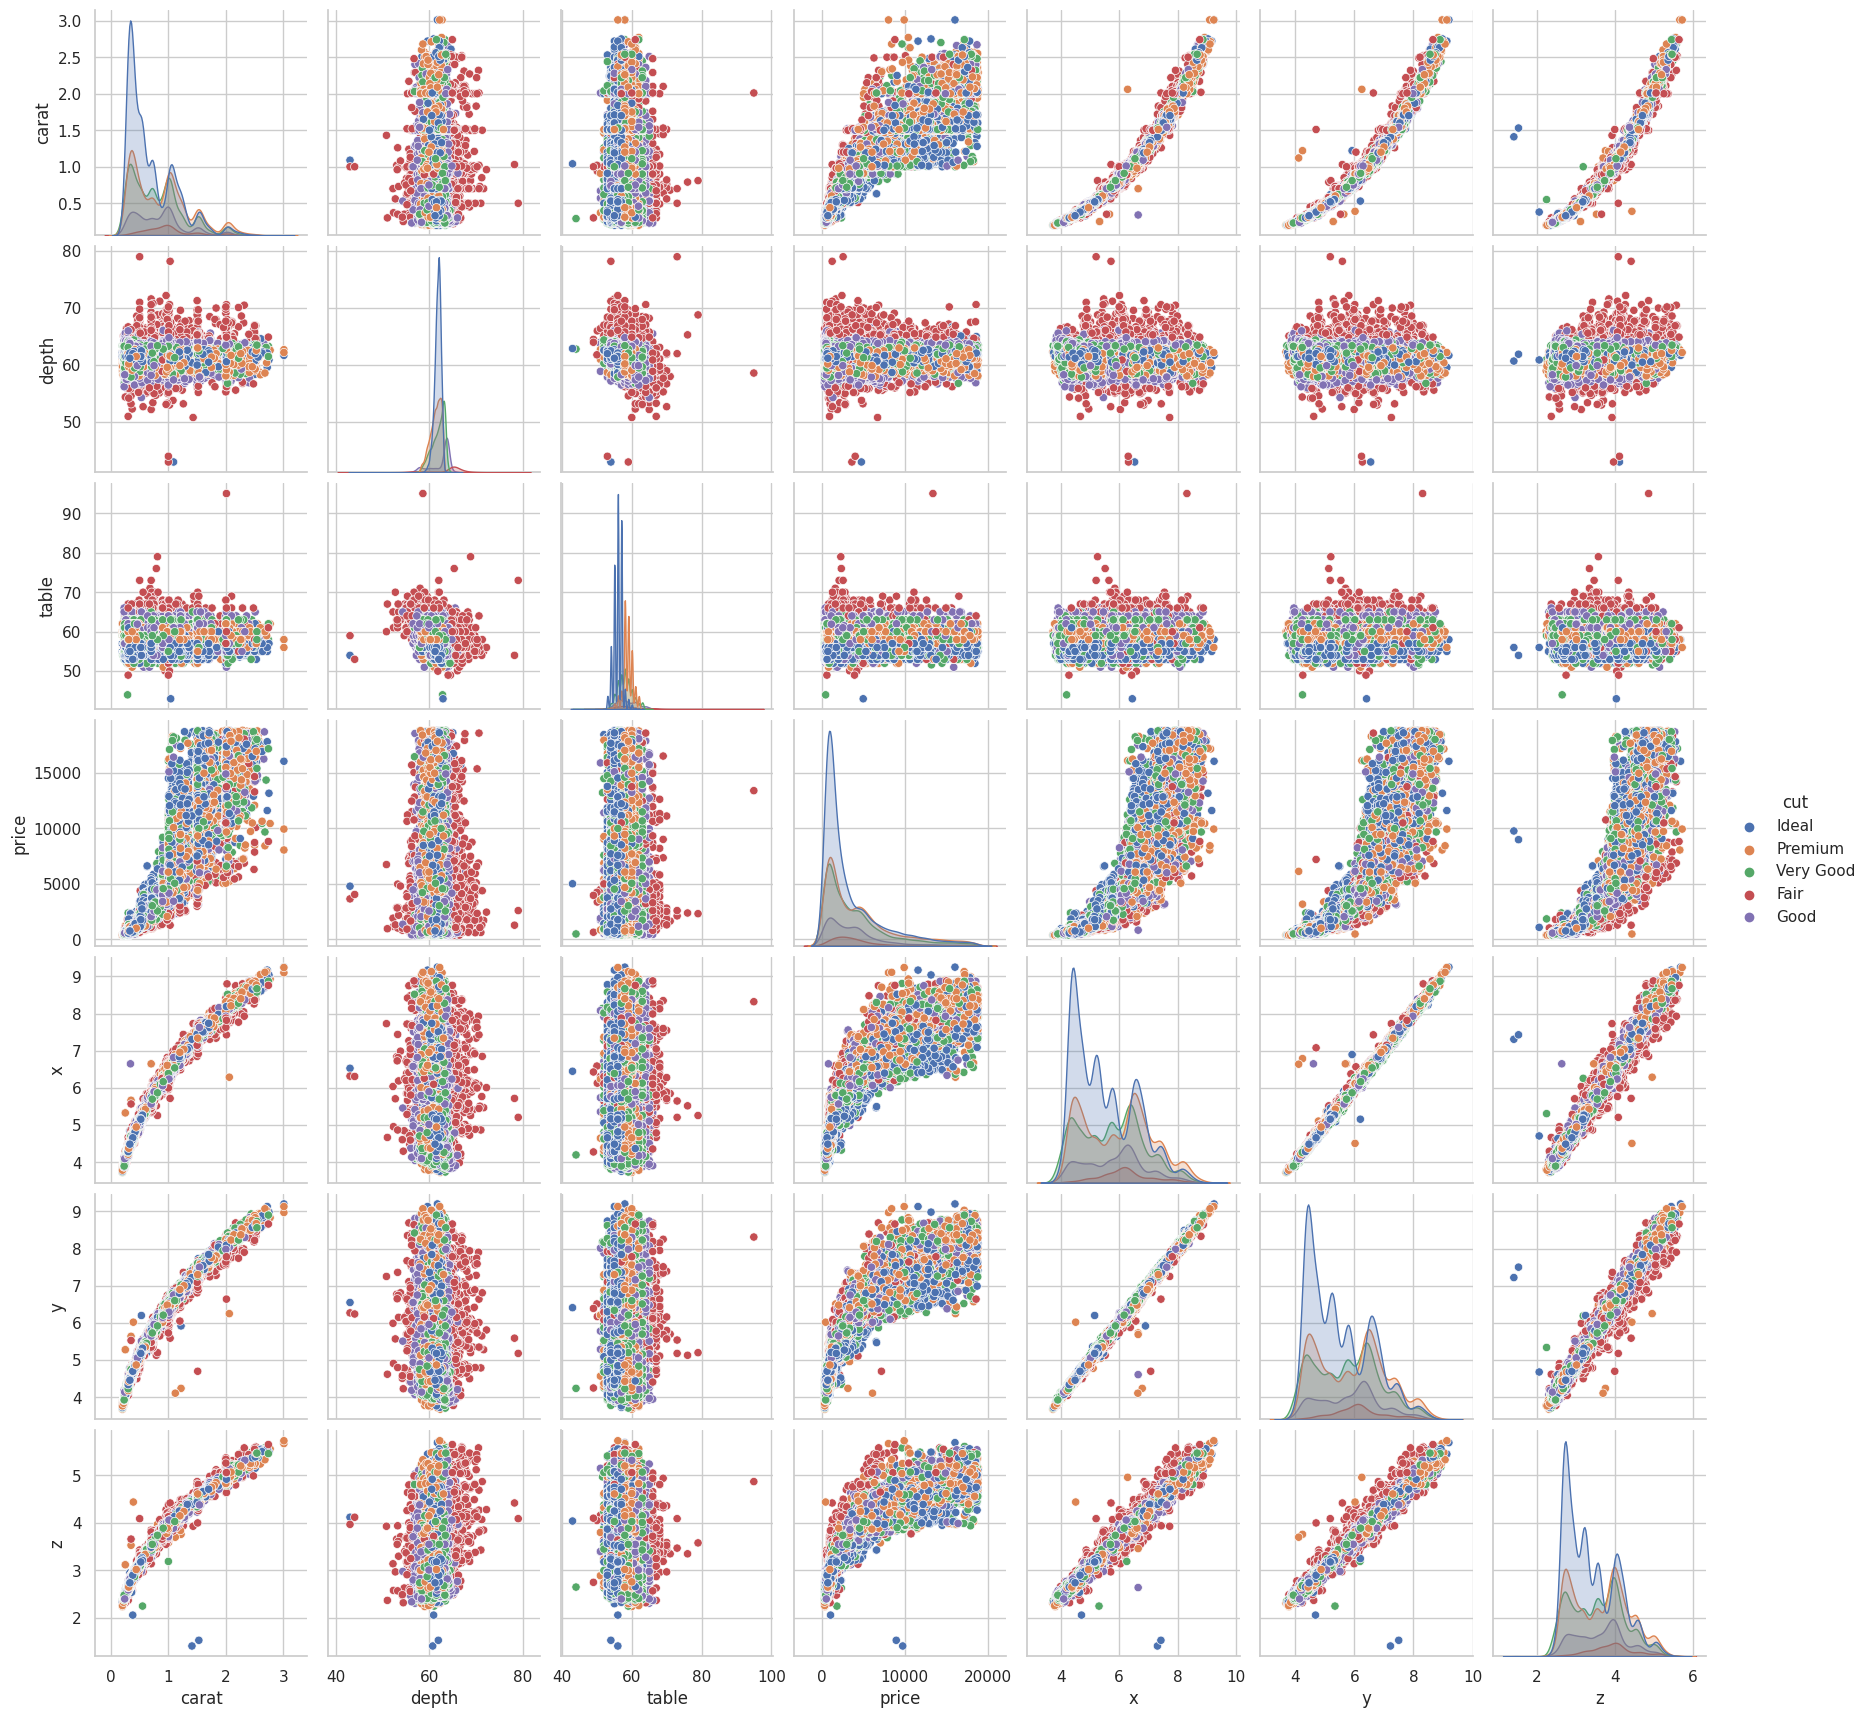

In [ ]:
sns.pairplot(Diamond_Price, hue= "cut")

## 4-Applying Manual ordinalencoder (according to the sort of importance of the feature

In [ ]:
categorical_cols = ['cut','color','clarity']
for column in categorical_cols:
    print('Unique {} attributes:'.format(column))
    display(Diamond_Price[column].unique().tolist())

Unique cut attributes:


['Ideal', 'Premium', 'Very Good', 'Fair', 'Good']

Unique color attributes:


['I', 'G', 'F', 'H', 'D', 'E', 'J']

Unique clarity attributes:


['SI2', 'VVS2', 'VS2', 'IF', 'VS1', 'SI1', 'VVS1', 'I1']

In [ ]:
Diamond_Price['cut'] = Diamond_Price['cut'].replace(['Fair'], 0)
Diamond_Price['cut'] = Diamond_Price['cut'].replace(['Good'], 1)
Diamond_Price['cut'] = Diamond_Price['cut'].replace(['Very Good'], 2)
Diamond_Price['cut'] = Diamond_Price['cut'].replace(['Premium'], 3)
Diamond_Price['cut'] = Diamond_Price['cut'].replace(['Ideal'], 4)

In [ ]:
Diamond_Price['color'] = Diamond_Price['color'].replace(['D'], 6)
Diamond_Price['color'] = Diamond_Price['color'].replace(['E'], 5)
Diamond_Price['color'] = Diamond_Price['color'].replace(['F'], 4)
Diamond_Price['color'] = Diamond_Price['color'].replace(['G'], 3)
Diamond_Price['color'] = Diamond_Price['color'].replace(['H'], 2)
Diamond_Price['color'] = Diamond_Price['color'].replace(['I'], 1)
Diamond_Price['color'] = Diamond_Price['color'].replace(['J'], 0)

In [ ]:
Diamond_Price['clarity'] = Diamond_Price['clarity'].replace(['I1'], 0)
Diamond_Price['clarity'] = Diamond_Price['clarity'].replace(['SI2'], 1)
Diamond_Price['clarity'] = Diamond_Price['clarity'].replace(['SI1'], 2)
Diamond_Price['clarity'] = Diamond_Price['clarity'].replace(['VS2'], 3)
Diamond_Price['clarity'] = Diamond_Price['clarity'].replace(['VS1'], 4)
Diamond_Price['clarity'] = Diamond_Price['clarity'].replace(['VVS2'],5)
Diamond_Price['clarity'] = Diamond_Price['clarity'].replace(['VVS1'], 6)
Diamond_Price['clarity'] = Diamond_Price['clarity'].replace(['IF'], 7)


In [ ]:
Diamond_Price.sample(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
17128,1.01,3,6,6,59.3,59.0,11480,6.56,6.53,3.88
18614,1.28,2,4,5,58.9,57.0,12285,7.13,7.17,4.21
18940,0.64,4,3,7,61.7,58.0,2960,5.52,5.56,3.42
9947,0.60,2,0,4,62.6,56.0,1378,5.37,5.41,3.37
12953,1.20,4,0,1,59.1,62.0,4509,6.97,6.94,4.11
4003,0.90,4,5,2,61.7,56.0,4147,6.16,6.23,3.82
11870,1.14,2,4,2,61.3,62.0,6194,6.71,6.77,4.13
32775,1.04,2,3,4,61.8,58.0,7049,6.50,6.55,4.03
8605,0.70,2,4,3,62.3,58.0,2812,5.64,5.72,3.54
593,1.05,4,3,2,59.7,56.0,5204,6.67,6.64,3.97


##5- Model Building

Steps of Building Model 

5.1- Sett up features and target

5.2- Build a pipeline of standard scalar and model

5.3- Fit all the models on training data

5.4- Evaluation the models for negative root mean square error

5.5- Save the model

### 5.1- Sett up features and target

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler

In [ ]:
train_set, test_set = train_test_split(Diamond_Price, test_size=0.2, random_state=42)

Diamond_Price_Train = train_set.drop("price", axis=1)
Diamond_Price_labels = train_set["price"].copy()

num_attribs = list(Diamond_Price_Train)
       

### 5.2- Build a pipeline of standard scalar and model

In [ ]:

num_pipeline = Pipeline([('Std_Scaler', StandardScaler())])

full_pipeline = ColumnTransformer([("num", num_pipeline, num_attribs)])


In [ ]:
Diamond_Price_prepared = full_pipeline.fit_transform(Diamond_Price_Train)

### checking results before Applying models

In [ ]:
Diamond_Price_Train.head()

,carat,cut,color,clarity,depth,table,x,y,z
1387,1.20,2,2,4,60.2,57.0,6.88,6.95,4.16
23338,1.23,4,2,1,62.4,57.0,6.79,6.84,4.25
33122,2.04,4,3,2,61.9,58.0,8.12,8.16,5.04
19196,0.33,4,2,7,62.1,55.0,4.41,4.44,2.75
32249,2.02,4,2,1,62.4,56.0,8.14,8.04,5.06


In [ ]:
Diamond_Price_labels.head()

1387      8039
23338     6152
33122    18153
19196      868
32249    12680
Name: price, dtype: int64

In [ ]:
Diamond_Price_prepared.shape

(34406, 9)

In [ ]:
Diamond_Price_prepared[:,:] # after appling Scalling

array([[ 0.86655873, -0.81499767, -0.82993802, ...,  1.03405793,
         1.1032316 ,  0.90620226],
       [ 0.9308076 ,  0.98197178, -0.82993802, ...,  0.95319851,
         1.00370992,  1.03720309],
       [ 2.66552727,  0.98197178, -0.2420147 , ...,  2.14812115,
         2.1979701 ,  2.18709928],
       ...,
       [ 1.68037783,  0.98197178, -0.82993802, ...,  1.55515202,
         1.62798229,  1.54665077],
       [-0.01150925, -0.81499767,  0.93383193, ...,  0.10866672,
         0.13515706,  0.20753115],
       [ 0.99505648, -0.81499767, -0.82993802, ...,  1.11491736,
         1.14846873,  1.00809179]])

### 5.3- Fit  model on training data

#### XGBoost

In [176]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
import time

params = { 'max_depth': [8],
           'n_estimators': [250],
           'colsample_bytree': [0.9], 
           'subsample': [0.8],
          'eta':[0.04],
          'min_child_weight':[3],
          'gamma':[0.0],
          'lambda':[2],
          'alpha':[1]}

model = xgb.XGBRegressor()
grid = GridSearchCV(estimator=model, 
                   param_grid=params,
                   scoring='r2', 
                   verbose=1)
start = time.time()
grid.fit(Diamond_Price_prepared, Diamond_Price_labels)
end = time.time()
print(end-start)
print("Best parameters:", grid.best_params_)
print("Best Score (R2): ", (grid.best_score_))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
49.77250075340271
Best parameters: {'alpha': 1, 'colsample_bytree': 0.9, 'eta': 0.04, 'gamma': 0.0, 'lambda': 2, 'max_depth': 8, 'min_child_weight': 3, 'n_estimators': 250, 'subsample': 0.8}
Best Score (R2):  0.9824895105681095


In [177]:
XGB_Model = grid.best_estimator_


#### Preparing the test set

In [178]:
Diamond_Price_Test = test_set.drop("price", axis=1)
Diamond_Price_Test_labels = test_set["price"].copy()

Diamond_Price_Test_num = Diamond_Price_Test
num_attribs = list(Diamond_Price_Test_num)



In [179]:
Diamond_Price_Test_Prepared = full_pipeline.transform(Diamond_Price_Test)

### 5.4- Evaluation the models for negative root mean square error

In [180]:
# Evaluation with XGB Train set

XGB_pred = XGB_Model.predict(Diamond_Price_prepared)
XGB_mse = mean_squared_error(Diamond_Price_labels.values, XGB_pred)
XGB_rmse = np.sqrt(XGB_mse)
XGB_rmse

363.3200588257652

In [181]:
# Evaluation with XGB Test set

XGB_pred = XGB_Model.predict(Diamond_Price_Test_Prepared)
XGB_mse = mean_squared_error(Diamond_Price_Test_labels.values, XGB_pred)
XGB_rmse = np.sqrt(XGB_mse)
XGB_rmse


525.5782588120836

### 5.5- Save the model

In [182]:
import joblib

joblib.dump(XGB_Model, "Diamond_RF_model_8.pkl")

['Diamond_RF_model_8.pkl']

## 6-Applying the model

In [183]:
Test = pd.read_csv("/content/test.csv")

In [184]:
Test.head()

,Id,carat,cut,color,clarity,depth,table,x,y,z
0,1,0.34,Ideal,G,VVS2,61.1,57.0,4.52,4.48,2.75
1,2,0.71,Premium,E,VS2,62.7,58.0,5.74,5.68,3.58
2,3,0.44,Very Good,I,VS1,62.8,56.0,4.83,4.88,3.05
3,4,0.81,Premium,E,SI2,60.1,59.0,6.09,6.03,3.65
4,5,0.40,Ideal,G,VVS1,61.2,56.0,4.74,4.80,2.92


In [185]:
Test.describe()

,Id,carat,depth,table,x,y,z
count,10788.000000,10788.000000,10788.000000,10788.000000,10788.000000,10788.000000,10788.000000
mean,5394.500000,0.798279,61.758315,57.452531,5.729514,5.732559,3.539398
std,3114.371686,0.475700,1.421266,2.236933,1.123736,1.115090,0.695483
min,1.000000,0.200000,54.000000,50.000000,0.000000,0.000000,0.000000
25%,2697.750000,0.400000,61.100000,56.000000,4.720000,4.727500,2.910000
50%,5394.500000,0.700000,61.800000,57.000000,5.700000,5.710000,3.520000
75%,8091.250000,1.040000,62.500000,59.000000,6.540000,6.540000,4.030000
max,10788.000000,4.500000,79.000000,73.000000,10.230000,10.160000,6.720000


### Applying Same encoder 

In [ ]:
Test_Id = Test[["Id"]]

In [ ]:
Test.drop(columns=["Id"], inplace=True)

In [192]:
Test['cut'] = Test['cut'].replace(['Fair'], 0)
Test['cut'] = Test['cut'].replace(['Good'], 1)
Test['cut'] = Test['cut'].replace(['Very Good'], 2)
Test['cut'] = Test['cut'].replace(['Premium'], 3)
Test['cut'] = Test['cut'].replace(['Ideal'], 4)


Test['color'] = Test['color'].replace(['D'], 6)
Test['color'] = Test['color'].replace(['E'], 5)
Test['color'] = Test['color'].replace(['F'], 4)
Test['color'] = Test['color'].replace(['G'], 3)
Test['color'] = Test['color'].replace(['H'], 2)
Test['color'] = Test['color'].replace(['I'], 1)
Test['color'] = Test['color'].replace(['J'], 0)

Test['clarity'] = Test['clarity'].replace(['I1'], 0)
Test['clarity'] = Test['clarity'].replace(['SI2'], 1)
Test['clarity'] = Test['clarity'].replace(['SI1'], 2)
Test['clarity'] = Test['clarity'].replace(['VS2'], 3)
Test['clarity'] = Test['clarity'].replace(['VS1'], 4)
Test['clarity'] = Test['clarity'].replace(['VVS2'],5)
Test['clarity'] = Test['clarity'].replace(['VVS1'], 6)
Test['clarity'] = Test['clarity'].replace(['IF'], 7)

### Apply Model on the Test file

In [197]:

Test_Prepared = full_pipeline.transform(Test)

In [195]:
final_predictions = XGB_Model.predict(Test_Prepared)

In [196]:
final_predictions

array([  839.4937,  2804.0781,   833.7464, ...,  4552.841 ,  4664.767 ,
       13927.931 ], dtype=float32)

In [ ]:
############## from chatgpt 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LinearRegression

# Generate some sample data
X = np.random.randn(100, 5)
y = np.random.randn(100)

# Create an instance of the model
model = LinearRegression()

# Specify the scoring metric (e.g., 'neg_mean_squared_error')
scoring = 'neg_mean_squared_error'

# Call the learning_plot function
learning_plot("Linear Regression", model, X, y, scoring, cv=5)


In [ ]:
########### from Farah
#ُEvaluation
#Learning_carve
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
x=Diamond_Price_Train
y=Diamond_Price_labels
def learning_plot(name, model, X, y, scoring, cv= 5):
  '''
  Prints the evaluation values.
  Args:
  name-- str type represents the name of the estimator.
  model-- the model we want to evaluate by.
  X-- training data.
  Y-- labeled data.
  scoring-- scoring metric.
  cv-- int describe the number of kfolds.
  Returns:
  The evaluation metric of the model.
  '''
  train_sizes, train_scores, validation_scores = learning_curve(estimator= 5, X, y )

learning_plot("Learning curve",XGB_Model,x,y,XGB_rmse)

In [ ]:
def learning_plot(name, model, X, y, scoring, cv= 5):
  '''
  Prints the evaluation values.
  Args:
  name-- str type represents the name of the estimator.
  model-- the model we want to evaluate by.
  X-- training data.
  Y-- labeled data.
  scoring-- scoring metric.
  cv-- int describe the number of kfolds.
  Returns:
  The evaluation metric of the model.
  '''
  train_sizes, train_scores, validation_scores = learning_curve(
    estimator = model,
    X = X,

In [198]:
final_predictions.shape

(10788,)

##7- save the results for submission

In [199]:
sample_submission = Test_Id

In [200]:
sample_submission["price"] = final_predictions.tolist()

<ipython-input-200-f3d8000edf4e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_submission["price"] = final_predictions.tolist()


In [201]:
sample_submission

,Id,price
0,1,839.493713
1,2,2804.078125
2,3,833.746399
3,4,2889.462402
4,5,1126.173218
...,...,...
10783,10784,1690.317871
10784,10785,6681.751953
10785,10786,4552.840820
10786,10787,4664.767090


In [202]:
 
sample_submission.to_csv("sample_submission_Hussein_abd Elhafeez.csv", index = None)

In [203]:
pd.read_csv("/content/sample_submission_Hussein_abd Elhafeez.csv.csv")

,Id,price
0,1,839.493713
1,2,2804.078125
2,3,833.746399
3,4,2889.462402
4,5,1126.173218
...,...,...
10783,10784,1690.317871
10784,10785,6681.751953
10785,10786,4552.840820
10786,10787,4664.767090
